# Assignment 0 - Python Refresh & Basic Classification
---

##### The Tutorial will take place online on Thursday, Nov 12th 2020 at 4:00pm (CET)<br><br>This Assignment is due on Monday, Nov 16th 2020 at 11:59pm (CET)


Welcome to the assignments for Big Data Management and Analytics!<br>This Assignment doubles as a refresher for your Python knowledge as well as giving you an introduction to the commands and features of standard python libraries like pandas, numpy, sklearn, etc. We will also try to give you a first overview on how a big data project could look like.<br>

## Goals

The overall goal of this assignment is to (re)introduce Python and some important libraries and give you a deeper understanding on how a basic classifier works. As classification is only mentioned briefly in the lecture we will try to give you a more detailed introduction, so this will be a lot to read, so bear with us! ;)
<br><br>
In this assignment we will train a classifier to identify the cultivator of a wine based on the features present in the dataset.<br> The data was collected in the scope of a chemical analysis of wine grown in the same region in Italy by three different cultivators, let's call them Neutesino (0), Don Camillo (1) and San Berulsconi (2).

## Step 0 - Setup

In [1]:
## First, ensure that you use the correct python version (should be 3.8.x)

#!source venv/bin/activate
#!alias python=python3
!python --version

In [2]:
## First we need to import the used libraries where 
#  additional code is (and will be) written
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rnd_seed=42
np.random.seed(seed=rnd_seed)

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## This is a bit of magic to make matplotlib figures appear inline in the notebook 
#  rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

In [3]:
## Next we load the provided dataset and display the first 5 lines (the head) of it. 
#  You can change the number of lines shown by adding a number inside the parenthesis, 
#  i.e. head(10) will give you the first 10 lines instead
df = pd.read_csv('wine_dataset.csv')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cultivator
0,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1,Don Camillo
1,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1,Don Camillo
2,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1,Don Camillo
3,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1,Don Camillo
4,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1,Don Camillo


# Step 1: Describe, Visualize and Preprocess the Dataset

In [4]:
## Let's get a more in-dept look at our data. In Step 0 you already used the head()
#  statement which shows the structure and the first few entries in the dataset.
#  Now, if we only want to display the header (aka the column names) you can use the
#  'columns' comand to get a list of the heading
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target', 'cultivator'],
      dtype='object')

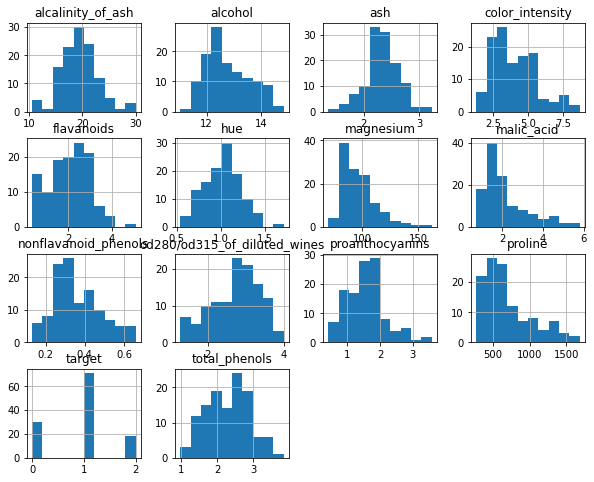

In [5]:
## A good idea when you start off with an unknown dataset is also to take a look
#  at the different distributions of the values. You can use the 'hist()' command
#  to plot a collection of histograms, one for each feature in the dataset. 
#  Take a good look at it, you might notice something that will be relevant
#  later on!
df.hist()
plt.show()

In [6]:
## If you are more into numbers, or want to take a more specific look, the 
#  'describe()' command is the way to go. It will show you the most common
#  statistical measures such as mean or minimum and maximum value, again per 
#  column.
#  This is also a great way to find potential outliers or faulty data.
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,119.000000,119.000000,119.000000,119.00000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,12.771092,2.154874,2.330420,19.47563,97.647059,2.295210,2.093445,0.358151,1.587143,4.020588,1.017277,2.738992,693.504202,0.899160
std,0.840584,1.080574,0.299354,3.41946,15.339430,0.603658,0.913480,0.123068,0.603788,1.568010,0.206160,0.652752,320.823302,0.629702
min,11.030000,0.740000,1.360000,10.60000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000,0.000000
25%,12.165000,1.475000,2.180000,17.35000,86.500000,1.820000,1.480000,0.265000,1.235000,2.800000,0.885000,2.305000,456.500000,0.500000
50%,12.600000,1.770000,2.320000,19.40000,95.000000,2.320000,2.140000,0.340000,1.570000,3.800000,1.030000,2.830000,600.000000,1.000000
75%,13.375000,2.555000,2.515000,21.50000,103.000000,2.770000,2.760000,0.430000,1.935000,5.000000,1.160000,3.195000,845.000000,1.000000
max,14.830000,5.800000,3.230000,30.00000,162.000000,3.850000,5.080000,0.660000,3.580000,8.700000,1.710000,4.000000,1680.000000,2.000000


After getting a better overview over our dataset, we now need to "extract" the labels we later on want to classify.
<br>
Remember, Classification is a Supervised Learning task where you use a labeled training set to "train" a classifier to recognize similar structures or rules in the data and group them together by the given labels.

In [7]:
## Usually this is done by separating the data into two different (numpy)
#  arrays, where one is called (capital) X and holds all features,
#  and y which stores the corresponding labels.

df_measurements = df.drop(columns=['target', 'cultivator'])
df_labels = df[['target']]

X = df_measurements.to_numpy()
y = df_labels.to_numpy().astype('int')

## Step 2: Implement common Train/Test Set Split by Test Set Size

Next, we need to split the dataset again, this time to make two smaller sets, one used for training and one for testing, therefore it is called Train/Test Split. This can be done in various ways. Usually you want about 80% train and 20% test data, but it varies depending on the application.

### <font color='#782769'>Now it's your turn!<br> TODO #1:</font>

In [8]:
## In utils.py you will find a prepared python function called
#  train_test_split(). Use numpy array split operations to divide the
#  dataset into a train and test set. Remember, that you already excluded
#  the label, so you end up with a X_train, X_test and y_train, y_test.

from bdma.utils import train_test_split

size_testset = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size_testset, random_state=rnd_seed)

## Make sure the shape (dimensions) of your dataframes are correct! 
#  Your X_train and X_test should now have 0.8*totalRowNumber (95) and 
#  0.2*totalRowNumber (24) respectively as row count and all non-label 
#  features (in our case 13). Whereas y_train and y_test have the exact
#  same number of rows but only one feature, the label. 

print(f"Shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Shapes - X_train: (95, 13), X_test: (24, 13), y_train: (95, 1), y_test: (24, 1)


## Step 3 - Implementing Cross Validation

In practice, we don't want to rely on a single random (or not so random) selection of data rows present in our testset. To train our model better and make it more robust we need to implement a different kind of Train/Test Split, so-called Cross Validation. When Cross validating a dataset, you not only make one split, but several iterations each time taking a different disjunct set of samples as test set. <br>
<img src="crossvalidation.png" width=600 height=600>

If you want more detailed information check out the [Wikipedia Page](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

### <font color='#782769'>Now it's your turn!<br> TODO #2:</font>

In [9]:
## Again, you will finde a prepared python function in utils.py called
#  cross_train_valid_split(). Complete the code there to generate 5 
#  different Train/Test splits.

from bdma.utils import cross_train_valid_split

val_sets = cross_train_valid_split(X_train, y_train, folds=5, shuffle=True, random_state=rnd_seed, verbose=False)

## Again, make sure that the dimensions of your splits are correct.

for vs in range(len(val_sets)):
    print(f"{vs+1} - X_train: {val_sets[vs]['X_train'].shape}, X_valid: {val_sets[vs]['X_valid'].shape}, y_train: {val_sets[vs]['y_train'].shape}, y_valid: {val_sets[vs]['y_valid'].shape}")

1 - X_train: (76, 13), X_valid: (19, 13), y_train: (76, 1), y_valid: (19, 1)
2 - X_train: (76, 13), X_valid: (19, 13), y_train: (76, 1), y_valid: (19, 1)
3 - X_train: (76, 13), X_valid: (19, 13), y_train: (76, 1), y_valid: (19, 1)
4 - X_train: (76, 13), X_valid: (19, 13), y_train: (76, 1), y_valid: (19, 1)
5 - X_train: (76, 13), X_valid: (19, 13), y_train: (76, 1), y_valid: (19, 1)


## Step 4 - _k_NN Classifcation

A kNN Classifier is a basic classification model that only has one parameter: _k_ (Actually there are more things to adjust but let's keep it simple here^^). The basic idea of this algorithm is that similar things are placed close together when looking at the different features. For example if you take a look at this plottet dataset (from MathWorks.com):
<img src='https://de.mathworks.com/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif'><br>
Imagine the x-axis shows the weight and the y-axis the height from different kinds of animals. One of them is the green group of relatively small animals (i.e. cats) that vary in weight. There is another group depicted in orange, that is lighter or similar in weight but taller (i.e. foxes) and the last group in blue which represents a taller and mostly heavier species (i.e. dogs). (Disclaimer: The dataset has nothing to do with animals OR wine, I just used the picture to make it more clear!^^) When we now get a new sample, x, a _k_NN Classifier computes the distance to all other points in the dataset and identifies the closest _k_ samples. The majority of these (known) labels is then assigned to x as a label. In this case x would be classified as fox (orange class) because 4 out of 5 nearest neighbors are foxes. 
If you want to read more about this, I suggest you take a look at [this](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) article.

### <font color='#782769'>Now it's your turn!<br> TODO #3:</font>

In [52]:
## When you take a look at the knn_classifier.py file you will find a 
#  prepared code structure to write your own kNN Classifier.
#  Don't worry, we already gave you most of it, there are just some
#  parts missing you need to fill out. When you are done with your
#  code import it into this project.

from bdma.knn_classifier import KNeighborsClassifier

The next thing we need is a evaluation how good your classifier did. The most common measurement for this is the **accuracy**. Accuracy is calculated by the number of correctly classified samples in each class, divided by the total number of samples in the test(!).

### <font color='#782769'>Now it's your turn!<br> TODO #4:</font>

In [11]:
## In metrics.py you will find an empty python function for
#  calculating the accuracy, given the actual labels of the 
#  dataset (y_test) and the predicted ones from your classifier
#  (y_pred). Compare the results and divide the number of 
#  correctly classified samples by the total number tested.
#  Afterwards import your accuracy_score code to this file.

from bdma.metrics import accuracy_score

In [57]:
## Let's test if everything is working. This is the place to execute 
#  your code.

from sklearn import preprocessing
from bdma.metrics import get_metric, accuracy_score

## Set k to 5 for a start, so we will only look at the 5 closest points.
#  If implemented correctly your algorithm should return an
#  accuracy_score of 0.75
#  and a list for the first 5 entries of the test set with their neighbors:
#  [[ 0 51 87  1  9]
#   [30 42 10 70 22]
#   [ 0 51 45 68 44]
#   [72 82  7 73 78]
#   [44 27 77 32 68]]

n_neighbors=5
clfKNN = KNeighborsClassifier(n_neighbors=n_neighbors)
clfKNN.fit(preprocessing.normalize(X_train, norm='l2'), y_train.ravel())
kNN = clfKNN.kneighbors(X_test[:5], return_distance=False)
print(f"{get_metric(clfKNN, X_test, y_test, metric=accuracy_score)}")
print(f"kNN: \n {kNN}")

accuracy_score: 0.2916666666666667
kNN: 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
# As long as you have no working solution or get stuck anywhere,
#  you can use this sklearn-call and import a kNN Classifier.

# from sklearn.neighbors import KNeighborsClassifier

## Part 5 -  Hyperparameter Optimization and Tuning

Now that we can see some results and get a score, we can start to tune and change our parameter (_k_). For this we will make a very basic optimization called... Brute Force! :P That's right, we're just gonna try them all! Well actually, we are not trying _all_ numbers. If you think about it, using a _k_ which is higher than the number of points in the dataset doesn't make any sense at all and also using a very high number (therefore looking at _almost_ every sample) is also not very helpful and the performance goes down...<br> <font color='#782769'>**Why do you think this is the case?**</font><br>

_..._

So starting from just looking at the one clostest neighbor, we will increase the number of neighbors each iteration until the given upper limit, called _runs_ in the code below. To save the best result for further use, you need to complete the optimization code by adding a small part and then print the best parameter choice:

### <font color='#782769'>Now it's your turn!<br> TODO #5:</font>

Best Hyperparameter: 0
Best Accuracy Score Value: 0


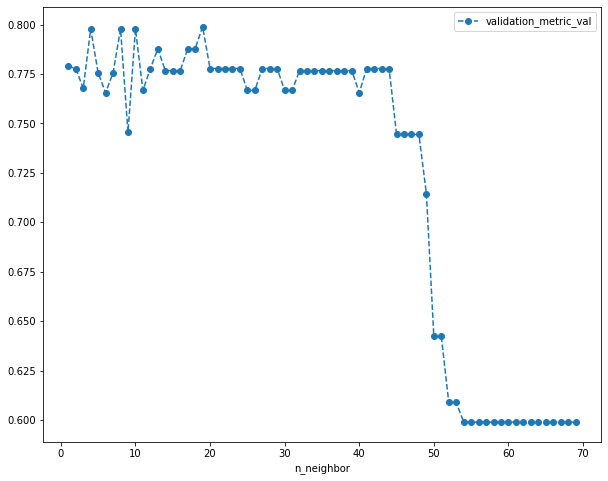

In [22]:
## We will now execute our classifier multiple times, each time increasing
#  the number of k.

from bdma.utils import visualize_hyperparams
from bdma.utils import train_clf_with_cross_valid

#  The upper limit for our k and therefore the number of runs
runs=5

#  Space to save the results in
results = []

#  As we are using Cross Validation we need to specify the number of 
#  sets, above we used 5, here we will go with 10.
n_fold = 10
#  And this time we will shuffle the samples for a even better 
#  Train/Validation split.
shuffle = True

neighbor_range = range(1, runs)

## In these variables, we will save the k that gave us the best results
#  (in best_hyperparam) as well as the score we could reach with this 
#  configuration (best_value).
best_hyperparam = 0
best_value = 0

for run in range(0,runs-1):

    hyperparams = {
        'n_neighbor': neighbor_range[run]
    }
    
    clfCustKNN = KNeighborsClassifier(n_neighbors=hyperparams['n_neighbor'])
    validation_metric_val = train_clf_with_cross_valid(clfCustKNN, n_fold, X_train, y_train, clf_name='kNN', 
                                                   shuffle=shuffle, metric=accuracy_score)
    results.append({**hyperparams, 'validation_metric_val': validation_metric_val, 'model': clfCustKNN})
    
#****  PUT YOUR CODE FOR TODO#5 HERE  ****#
# Keep track of the best metric score and the corresponding hyperparameter




    
## After all iterations we can plot all resulting scores with their 
#  respective k value.
visualize_hyperparams(results, test_metric_col='validation_metric_val')

print(f"Best Hyperparameter: {best_hyperparam}")
print(f"Best Accuracy Score Value: {best_value}")

Now, let's use this new parameter and take a look at the accuracy score. Did it change?

In [25]:
## Add your Parameter here in place of 1
n_neighbors=1
clfKNN = KNeighborsClassifier(n_neighbors=n_neighbors)
clfKNN.fit(preprocessing.normalize(X_train, norm='l2'), y_train.ravel())
print(f"{get_metric(clfKNN, X_test, y_test)} (clfKNN)")

accuracy_score: 0.7083333333333334 (clfKNN)


Your test accuracy should now be ~ 0.79.

Questions every Data Scientist should always ask:<br>
<font color='#782769'>**Am I using the right model for this tasks?** <br> **Is the current performance measurement actually a good representation of the performance of my model?** </font>

Let's take a quick look at another so-called Dummy Classifier. A Dummy Classifier is simply a Model that always returns the label most frequent in the dataset. We will here simply import one from the sklearn library:

In [26]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
print(f"{get_metric(dummy, X_test, y_test)}")

accuracy_score: 0.5833333333333334


Even the Dummy Classifier gets an "okay" result with an accuracy score of 0.58 simply by guessing the most frequent class. We should check out our dataset again. Remember all the Histograms from way up there? Let's take a closer look on one of the very last ones, the distribution of the target feature:

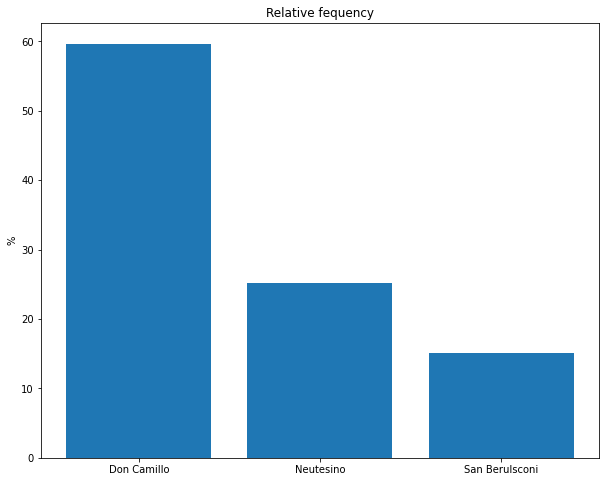

In [27]:
from bdma.utils import show_dataset_distribution

show_dataset_distribution(df, col_label_code='target', col_label_desc='cultivator')

As you can see, this dataset is skewed, meaning there are way more entries from cultivator "Don Camillo" in there as there are from the other two. This also results in a skewed accurracy score. Because there are more datapoints with label "Don Camillo", the algorithm will most probably learn to classify the samples belonging to "Don Camillo" very well, but it will probably fail to identify and correctly classify the samples from the other two classes. To avoid something like this, a simple performance measurement like accuracy might not be sufficient. Fortunetly there are (more suited) alternatives:
### Precision, Recall and F1 Measurement
Precision and Recall are two measurements that take exactly this phenomena into account. Precision is a measurement for the number of selected samples that are relevant while recall depicts the number of relevant samples that are selected. In other words, out of all the points the classifier labeled as positive (belonging to one class), the number of correctly
identified samples is the precision. Recall stands for the proportion of samples that actually belong to the positive label and that are found by the classifier. The F1 measurement is the harmonic mean out of these values and can be calculated as

$$ F_1 = \frac{2 ∗ Precision ∗ Recall}{Precision + Recall} $$

As all three measures have their minimum at 0 and their maximum score at
1, it is a simple but clear value to determine the quality of a classification
process. The higher the value the more correct classifications have been made
and the better the algorithm works. For more information, again check out the [Wikipedia Page]('https://en.wikipedia.org/wiki/Precision_and_recall').
<img src='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg' height='400px'>

### <font color='#782769'>Now it's your turn!<br> TODO #6 und #7:</font>

In [ ]:
## In metrics.py you will find empty functions for precision, recall 
#  and the F1 Score. Implement all these functions for your classifier
#  and re-do the hyperparameter tuning step. Code to execute your 
#  classifications is below:

Best Hyperparameter: 1
Best F1 Score Value: 0.6638445214915804


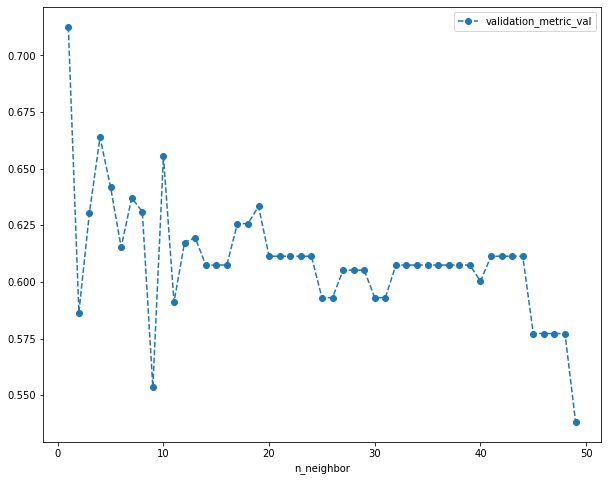

In [37]:
## Same code as above, this time we will use the F1 score to optimize.
import numpy as np

from bdma.metrics import f1_score

#  Again, change the number of runs like you did above.
runs=5

results = []

n_fold = 10
shuffle = True
neighbor_range = range(1, runs)

best_value = 0
best_hyperparam = 0

for run in range(0,runs-1):

    hyperparams = {
        'n_neighbor': neighbor_range[run]
    }
    
    clfCustKNN = KNeighborsClassifier(n_neighbors=hyperparams['n_neighbor'])
    validation_metric_val = train_clf_with_cross_valid(clfCustKNN, n_fold, X_train, y_train, clf_name='kNN', 
                                                   shuffle=shuffle, metric=f1_score, args={'average':'macro'})
    results.append({**hyperparams, 'validation_metric_val': validation_metric_val, 'model': clfCustKNN})
    
#****  PUT YOUR CODE FOR TODO#7 HERE  ****#
# Keep track of the best metric score and the corresponding hyperparameter




    
    
visualize_hyperparams(results, test_metric_col='validation_metric_val')

print(f"Best Hyperparameter: {best_hyperparam}")
print(f"Best F1 Score Value: {best_value}")

Did the results change? You should have now gotten a different _k_ value as optimum. Use this new value to get even better classification results below. Compare your results to the ones from above.

In [44]:
## To compare the results, again, use your "old" best parameter here: 
n_neighbors1=19
clfKNN1 = KNeighborsClassifier(n_neighbors=n_neighbors1)
clfKNN1.fit(preprocessing.normalize(X_train, norm='l2'), y_train.ravel())


## And now put in your new best parameter:
n_neighbors2=1
clfKNN2 = KNeighborsClassifier(n_neighbors=n_neighbors2)
clfKNN2.fit(preprocessing.normalize(X_train, norm='l2'), y_train.ravel())

print(f"old scores with hyperparam n_neighbors = {n_neighbors1}:")
print(f"{get_metric(clfKNN1, X_test, y_test, metric=f1_score, args={'average':'macro'})}")
print(f"{get_metric(clfKNN1, X_test, y_test, metric=accuracy_score)}")

print(f"new scores with hyperparam n_neighbors = {n_neighbors2}:")
print(f"{get_metric(clfKNN2, X_test, y_test, metric=f1_score, args={'average':'macro'})}")
print(f"{get_metric(clfKNN2, X_test, y_test, metric=accuracy_score)}")

old scores with hyperparam n_neighbors = 19:
f1_score: 0.548076923076923
accuracy_score: 0.7916666666666666
new scores with hyperparam n_neighbors = 1:
f1_score: 0.680223990568818
accuracy_score: 0.7083333333333334


Your new test F1 should now be ~ 0.68 and the accuracy ~ 0.70.

## *Part 6: (BONUS) Repeat Part 5 with sklearn Implementation of RandomForest Classifier

Even when optimizing the _k_NN Classifier, the results are still not the very best (like no one ever was...^^). In this case, the model simply might not be able to find good rules to separate the data or the generalization did not go well. In this case, another approach is always recommended. We will not go into a lot of detail in our lecture, but there are tons of other classification models and methods out there. One of them, the RandomForest Classifier is always a good choice whenever there is a skew in the dataset or training has to be quick (even though it will be way slower than _k_NN on our dataset).
<br><br>Below, you can find the code for a RandomForest Classifier. Feel free to play around with it and change its parameters. To get more information you can execute the help (?) command:

In [46]:
from sklearn.ensemble import RandomForestClassifier

?RandomForestClassifier

In [49]:
from tqdm.notebook import tqdm

runs=100

results = []

n_fold = 10
shuffle = True

best_value = 0
best_hyperparam = 0
best_model = None

for run in tqdm(range(0,runs-1)):
    hyperparams = {
        'n_estimators': random.randint(10,50), 
        'criterion': random.randint(0,1),
        'max_depth': random.randint(5,15)
    }    
    
    clfRF = RandomForestClassifier(
        n_estimators=hyperparams['n_estimators'], 
        criterion=['gini','entropy'][hyperparams['criterion']],
        max_depth=hyperparams['max_depth'],  
        random_state=rnd_seed)
    
    validation_metric = train_clf_with_cross_valid(clfRF, n_fold, preprocessing.normalize(X_train), y_train, clf_name='RF', shuffle=shuffle, metric=f1_score, args={'average':'macro'})
    results.append({**hyperparams, 'validation_metric_val': validation_metric, 'model': clfRF})
    
    if validation_metric > best_value:
        best_value = validation_metric
        best_hyperparams = hyperparams
        best_model = clfRF
    
#visualize_hyperparams(results, test_metric_col='validation_metric_val')

print(best_hyperparams)
print(best_value)

print(f"{get_metric(best_model, preprocessing.normalize(X_test), y_test, metric=f1_score, args={'average':'macro'})}")
print(f"{get_metric(best_model, preprocessing.normalize(X_test), y_test, metric=accuracy_score)}")


{'n_estimators': 14, 'criterion': 0, 'max_depth': 11}
0.9130991230991231
f1_score: 0.9029304029304029 (clfKNN)
accuracy_score: 0.9166666666666666 (clfKNN)
